# Lab 2

### Keira Hansen and Alex Foster

## Question 1

In 1 day the average cosmic-ray background is __5__ and the average number of gamma-rays emitted by my hypothetical source is __8__.

### __(A)__

Show how the probability distribution of the background changes as you integrate (sum) for more days.

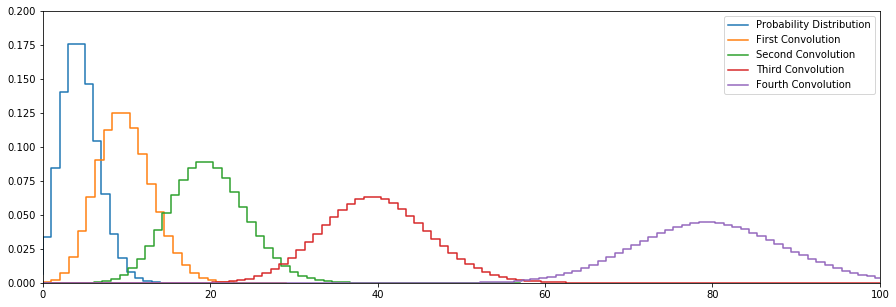

In [67]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special

x0 = np.arange(0, 15)
dist = stats.poisson.pmf(x0, 5)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, conv1)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, conv2)
x3 = np.linspace(0, len(conv3), len(conv3))

conv4 = np.convolve(conv3, conv3)
x4 = np.linspace(0, len(conv4), len(conv4))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.step(x0, dist, label='Probability Distribution')
ax.step(x1, conv1, label='First Convolution')
ax.step(x2, conv2, label='Second Convolution')
ax.step(x3, conv3, label='Third Convolution')
ax.step(x4, conv4, label='Fourth Convolution')
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.2)

ax.legend(loc='best')
plt.show()


The blue line shows the probability mass function for the poisson distribution. I've then plotted the next four convolutions of the distribution with itself, which sums 

### __(B)__

Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

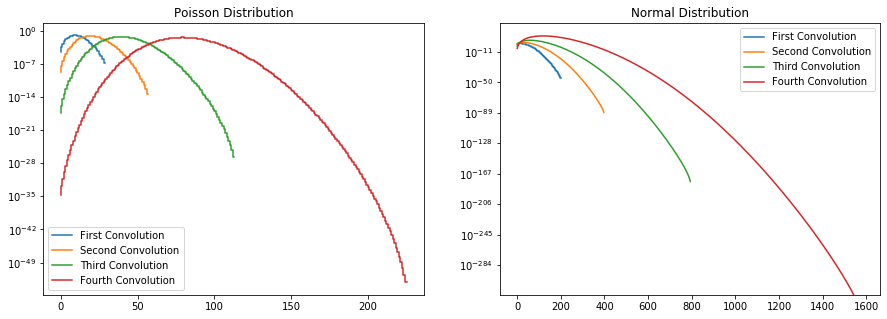

In [47]:
x = np.linspace(0, 10, num=100)
norm = stats.norm.pdf(x)

conv5 = np.convolve(norm, norm)
x5 = np.linspace(0, len(conv5), num=len(conv5))

conv6 = np.convolve(conv5, conv5)
x6 = np.linspace(0, len(conv6), num=len(conv6))

conv7 = np.convolve(conv6, conv6)
x7 = np.linspace(0, len(conv7), num=len(conv7))

conv8 = np.convolve(conv7, conv7)
x8 = np.linspace(0, len(conv8), num=len(conv8))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Poisson Distribution')
ax[0].step(x1, conv1, label='First Convolution')
ax[0].step(x2, conv2, label='Second Convolution')
ax[0].step(x3, conv3, label='Third Convolution')
ax[0].step(x4, conv4, label='Fourth Convolution')

ax[0].semilogy()
ax[0].legend(loc='best')

ax[1].set_title('Normal Distribution')
ax[1].step(x5, conv5, label='First Convolution')
ax[1].plot(x6, conv6, label='Second Convolution')
ax[1].plot(x7, conv7, label='Third Convolution')
ax[1].plot(x8, conv8, label='Fourth Convolution')

ax[1].semilogy()
ax[1].legend(loc='best')

plt.show()

Looking at the probability distibution the naive observation would be that the distribution of the summed data over 5 days, the red function on the plot from (A), is gaussian, but plotting the probability distribution on a log scale it is clear that the function doesn't have the quadratic shape associated with a gaussian distribution plotted on a log scale, so we can rule out our probability distribution being gaussian. Another observation is that, while the probability distribution plotted on standard scale changes in shape as we keep convolving, the same distributions plotted on the log scale don't change their shape. Instead the 'Fourth Convolution' appears just to be a scaled up version of the 'First Convolution' and would indicate that after 5 days the summed probability distribution is still a poisson distribution.

### __(C)__

Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

Using the plot from part (A) we can see that the PDF function, blue line, is the sharpest distribution and is skewed with the tail of the distribution being longer than the head. As we average over more and more days the probability distributions flattens out over a more broad range of values and shifts it's mean to the right.  

### __(D)__

Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. (In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.)

After 7 days we would have seen 56 gamma rays from our source.

In [70]:
events = 56

cdf = 0
for i in range(events + 1):
    cdf += conv4[i]
ppf = stats.norm.ppf(1 - cdf)

print(str(ppf) + '\u03C3')

2.7551934279390267σ


## Question 2

### __(A)__

Show how the distribution changes as you average over more observing intervals.

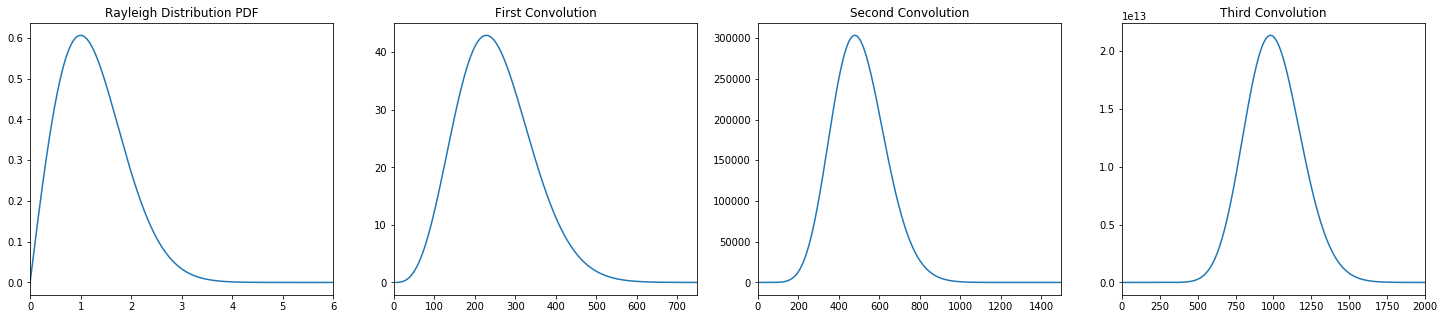

In [62]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

fig, ax = plt.subplots(1, 4, figsize=(25, 5))

x = np.linspace(0, 10, 1000)
dist = stats.rayleigh.pdf(x)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, conv1)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, conv2)
x3 = np.linspace(0, len(conv3), len(conv3))

ax[0].plot(x, dist, label='PDF')
ax[0].set_xlim(0, 6)
ax[0].set_title("Rayleigh Distribution PDF")

ax[1].plot(x1, conv1)
ax[1].set_xlim(0, 750)
ax[1].set_title("First Convolution")

ax[2].plot(x2, conv2)
ax[2].set_xlim(0, 1500)
ax[2].set_title("Second Convolution")

ax[3].plot(x3, conv3)
ax[3].set_xlim(0, 2000)
ax[3].set_title("Third Convolution")

plt.show()

### __(B)__

Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

The rayleigh distribution is skewed with a much longer tail than head of the of the distribution. As we convolve the distribution with itself its shape shifts the the right, the range broadens but the height increased, instead of decreasing like the poisson distribution did. The shape of the distribution quickly approaches a gaussian distribution, within 3 averages.

## Question 3

### Version 1

### __(A)__

From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

In [101]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

prob = 1 - stats.norm.cdf(5.56, loc=0, scale=1)
ppf = np.abs(stats.norm.ppf(prob))
print("Probability = " + str(prob))
print("%f\u03C3" % (ppf))

Probability = 1.3488732464317366e-08
5.560000σ


### Version 2

### __(B)__

If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

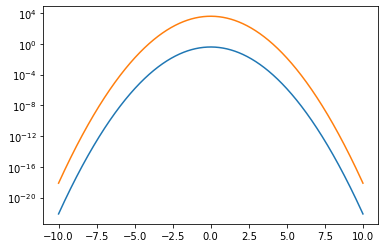

In [102]:
x = np.linspace(-10, 10, 1000)

pdf = stats.norm.pdf(x, loc=0, scale=1)
scaled_pdf = pdf * 10000

plt.plot(x, pdf)
plt.plot(x, scaled_pdf)
plt.semilogy()
plt.show()

### __(C)__

Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [105]:
scaled_prob = prob * 10000
print(scaled_prob)
scaled_ppf = np.abs(stats.norm.ppf(scaled_prob))
print("%f\u03C3" % (scaled_ppf))

0.00013488732464317366
3.642718σ


## Question 4

### __(A)__

Calculate the signal required for a 5-sigma detection in Version 1.

In [110]:
val = 5
prob = 1 - stats.norm.cdf(val)
signal = np.abs(stats.norm.ppf(prob))
print(signal)

4.999999999970176


### __(B)__

Calculate the signal required for a 5-sigma detection in Version 2.

In [112]:
scaled_prob = prob / 10000
scaled_signal = np.abs(stats.norm.ppf(scaled_prob))
print(scaled_signal)

6.550537612682236


### __(C)__

Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

In [124]:
perc = (scaled_signal / signal) * 100
print("%5.5f%s" %(perc, "%"))

131.01075%


For a trial factor of 10000 the signal only needs to be about 31% brighter.

### __(D)__

If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

In [113]:
scaled_prob2 = prob / 1000
scaled_signal2 = np.abs(stats.norm.ppf(scaled_prob2))
print(scaled_signal2)

scaled_prob3 = prob / 100000
scaled_signal3 = np.abs(stats.norm.ppf(scaled_prob3))
print(scaled_signal3)

6.1976008229117365
6.88613071907523
